<a href="https://colab.research.google.com/github/Melikakmm/CLPBgroup17/blob/main/Exercise_4/DATAGENERATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data generation with different N :

In [ ]:
pip install tsfresh

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
from tsfresh import extract_features

from xgboost import XGBClassifier, plot_tree

%run /content/plot.py

In [ ]:

np.random.seed(12345)


jump = lambda drift, stdev: int(np.random.normal(drift,stdev))

for i in range(10):
    print(jump(5,50))


def pattern(i,z,a):
    return int(a*np.sin((np.pi*i)/z))

-5
28
-20
-22
103
74
9
19
43
67


In [ ]:
# random seed for reproducibility
np.random.seed(12345)

# pattern parameters: Z=nr of steps, A=amplitude
Z=12
A=500

# size of each sample of the timeseries
L=60
# step parameters: introduce small positive bias 
DX = 50
bias = 5
n = [20, 50, 100, 150, 200, 250, 300, 400, 500]



for N in [20, 50, 100, 150, 200, 250, 300, 400, 500]:
          globals()['y_{}'.format(N)] = [0] * N
          globals()['x_{}'.format(N)] = [[0] * L for i in range(N)]

          for i in range(N):
              if i>0:
                  globals()['x_{}'.format(N)][i][0] = globals()['x_{}'.format(N)][i-1][-1] + jump(bias,DX)
              
              for j in range(1,L):
                  globals()['x_{}'.format(N)][i][j] = globals()['x_{}'.format(N)][i][j-1] + jump(bias,DX)
                  

              if globals()['y_{}'.format(N)][i]>0:
                  j0 = np.random.randint(0,L-1-Z)
                  sign = 3-2*globals()['y_{}'.format(N)][i]
                  for j in range(Z):
                      globals()['x_{}'.format(N)][i][j0+j] += sign*pattern(j,Z,A)








    

#Show_data(x,L,"original data")

#print(len(x))

for N in n:
  globals()['x_{}'.format(N)] = np.array(globals()['x_{}'.format(N)])

print(x_20)

[[   0   -5   23 ...  163  169  211]
 [ 183  231  235 ...  623  619  657]
 [ 580  473  420 ...  898  862  888]
 ...
 [5027 5030 5021 ... 4759 4830 4815]
 [4836 4805 4816 ... 5632 5608 5590]
 [5533 5485 5460 ... 4737 4800 4835]]


In [ ]:
# we did not use the rescaling data, but we put here anyways


#def RESCALE(x, N):
#  for i in range(0, N):
#    for l in range(0, L):
#      xm = np.mean(x[i])
#      x[i][l] = x[i][l]-xm
#      x = x / np.var(x)
#  return  


In [ ]:
#for N in n:
#  RESCALE(globals()['x_{}'.format(N)], N)

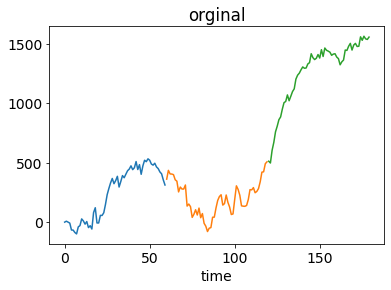

In [ ]:
Show_data(x_100, L, 'orginal')

In [ ]:
#we added an extra attribute to get_df function in order to involve N too


def get_df(x, N):
    
    #N = #samples, t = timesteps
    N, t = x.shape[0], x.shape[1]
    #build id columns
    id_col = np.repeat(np.arange(N),t)
    #build time columns
    time_col = np.tile(np.arange(t),N)
    #build var columns
    x_col = x.flatten()
      
    #build dict for df
    x_dict = {'id':id_col,'time':time_col,'value':x_col}
        
    #return dataframe
    return pd.DataFrame(x_dict)

In [ ]:
#the DataFrames are df_N for N samples

for N in n:
  globals()['df_{}'.format(N)] = get_df(globals()['x_{}'.format(N)], N)

In [ ]:
#for example:
df_20

,id,time,value
0,0,0,0
1,0,1,-5
2,0,2,23
3,0,3,3
4,0,4,-19
...,...,...,...
1195,19,55,4687
1196,19,56,4664
1197,19,57,4737
1198,19,58,4800


In [ ]:
for N in n:  
   globals()['x_features_{}'.format(N)] = extract_features(
                            globals()['df_{}'.format(N)], #our dataframe
                            column_id='id', #sample id, from 0 to N
                            column_sort='time', #timestep, from 0 to t
                            column_kind=None, #we have only one feature
                            column_value='value', #value of input 
                            n_jobs=4) #number of cores

Feature Extraction: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


In [ ]:
#now DataFrames are like x_features_N for N samples
#for example:

x_features_100


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,"value__matrix_profile__feature_""min""__threshold_0.98","value__matrix_profile__feature_""max""__threshold_0.98","value__matrix_profile__feature_""mean""__threshold_0.98","value__matrix_profile__feature_""median""__threshold_0.98","value__matrix_profile__feature_""25""__threshold_0.98","value__matrix_profile__feature_""75""__threshold_0.98",value__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,14611.0,6.365641e+06,37.118644,5.288136,-0.439655,326.5,...,3.730074,3.860623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,510.285714
1,1.0,0.0,0.0,1.0,12129.0,3.638839e+06,44.203390,2.474576,-0.500000,190.5,...,3.674542,3.814290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440.714286
2,1.0,0.0,0.0,1.0,75951.0,1.005537e+08,34.796610,17.677966,0.301724,1375.5,...,3.352320,3.552558,NaN,0.874845,6.364878,2.447654,1.509716,1.124226,3.374411,1539.857143
3,1.0,0.0,0.0,1.0,110640.0,2.065603e+08,31.661017,12.644068,0.232759,1816.0,...,3.692020,3.834951,NaN,0.790510,4.011250,2.016873,1.878775,1.122557,2.690893,2210.000000
4,1.0,0.0,0.0,1.0,136778.0,3.123514e+08,33.881356,-6.152542,-0.396552,2300.0,...,3.906512,3.988984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2414.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.0,1.0,1290925.0,2.777743e+10,37.983051,2.728814,-0.051724,21554.5,...,3.821382,3.902278,NaN,1.004873,3.326067,2.005007,1.998784,1.528402,2.374410,21784.428571
96,1.0,0.0,0.0,1.0,1300009.0,2.817124e+10,44.949153,6.949153,-0.353448,21725.0,...,3.676328,3.788618,NaN,0.656691,3.070859,1.846731,2.129066,1.075384,2.466248,22020.428571
97,1.0,0.0,0.0,1.0,1318871.0,2.899071e+10,37.220339,3.389831,-0.146552,21985.5,...,3.956922,3.988984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22093.000000
98,1.0,0.0,0.0,1.0,1301198.0,2.821943e+10,38.593220,-7.779661,1.568966,21715.0,...,3.922204,3.988984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21816.285714
